<a href="https://colab.research.google.com/github/Zainaazar/Algorithms/blob/main/Supervised_Classification_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🍄 Supervised Classification: Identifying Poisonous Mushrooms with K-Nearest Neighbors
This project implements a Supervised Machine Learning pipeline to classify mushrooms as either edible (0) or poisonous (1) using the K-Nearest Neighbors (KNN) algorithm.

##🎯 Objective: Building a Predictive Model
The goal is to train a model on labeled data to accurately predict the toxicity of new, unseen mushroom samples based on their physical characteristics.

## ⚙️ The Technical Workflow
1. Data Preparation and Preprocessing
Data Cleaning: We handle missing values (?) and remove the stalk-root feature.

Target Encoding: The target variable (y) is converted from categorical labels (e, p) to numerical labels (0, 1) for model compatibility.

One-Hot Encoding via ColumnTransformer: Since all features are categorical, we use One-Hot Encoding to convert them to a numerical format. The ColumnTransformer ensures this preprocessing step is cleanly applied to the entire dataset.

2. Model Pipeline and Training
Pipeline (make_pipeline): We combine the data preprocessing (ColumnTransformer) and the classifier (KNeighborsClassifier) into a single pipeline. This prevents data leakage and simplifies the workflow.
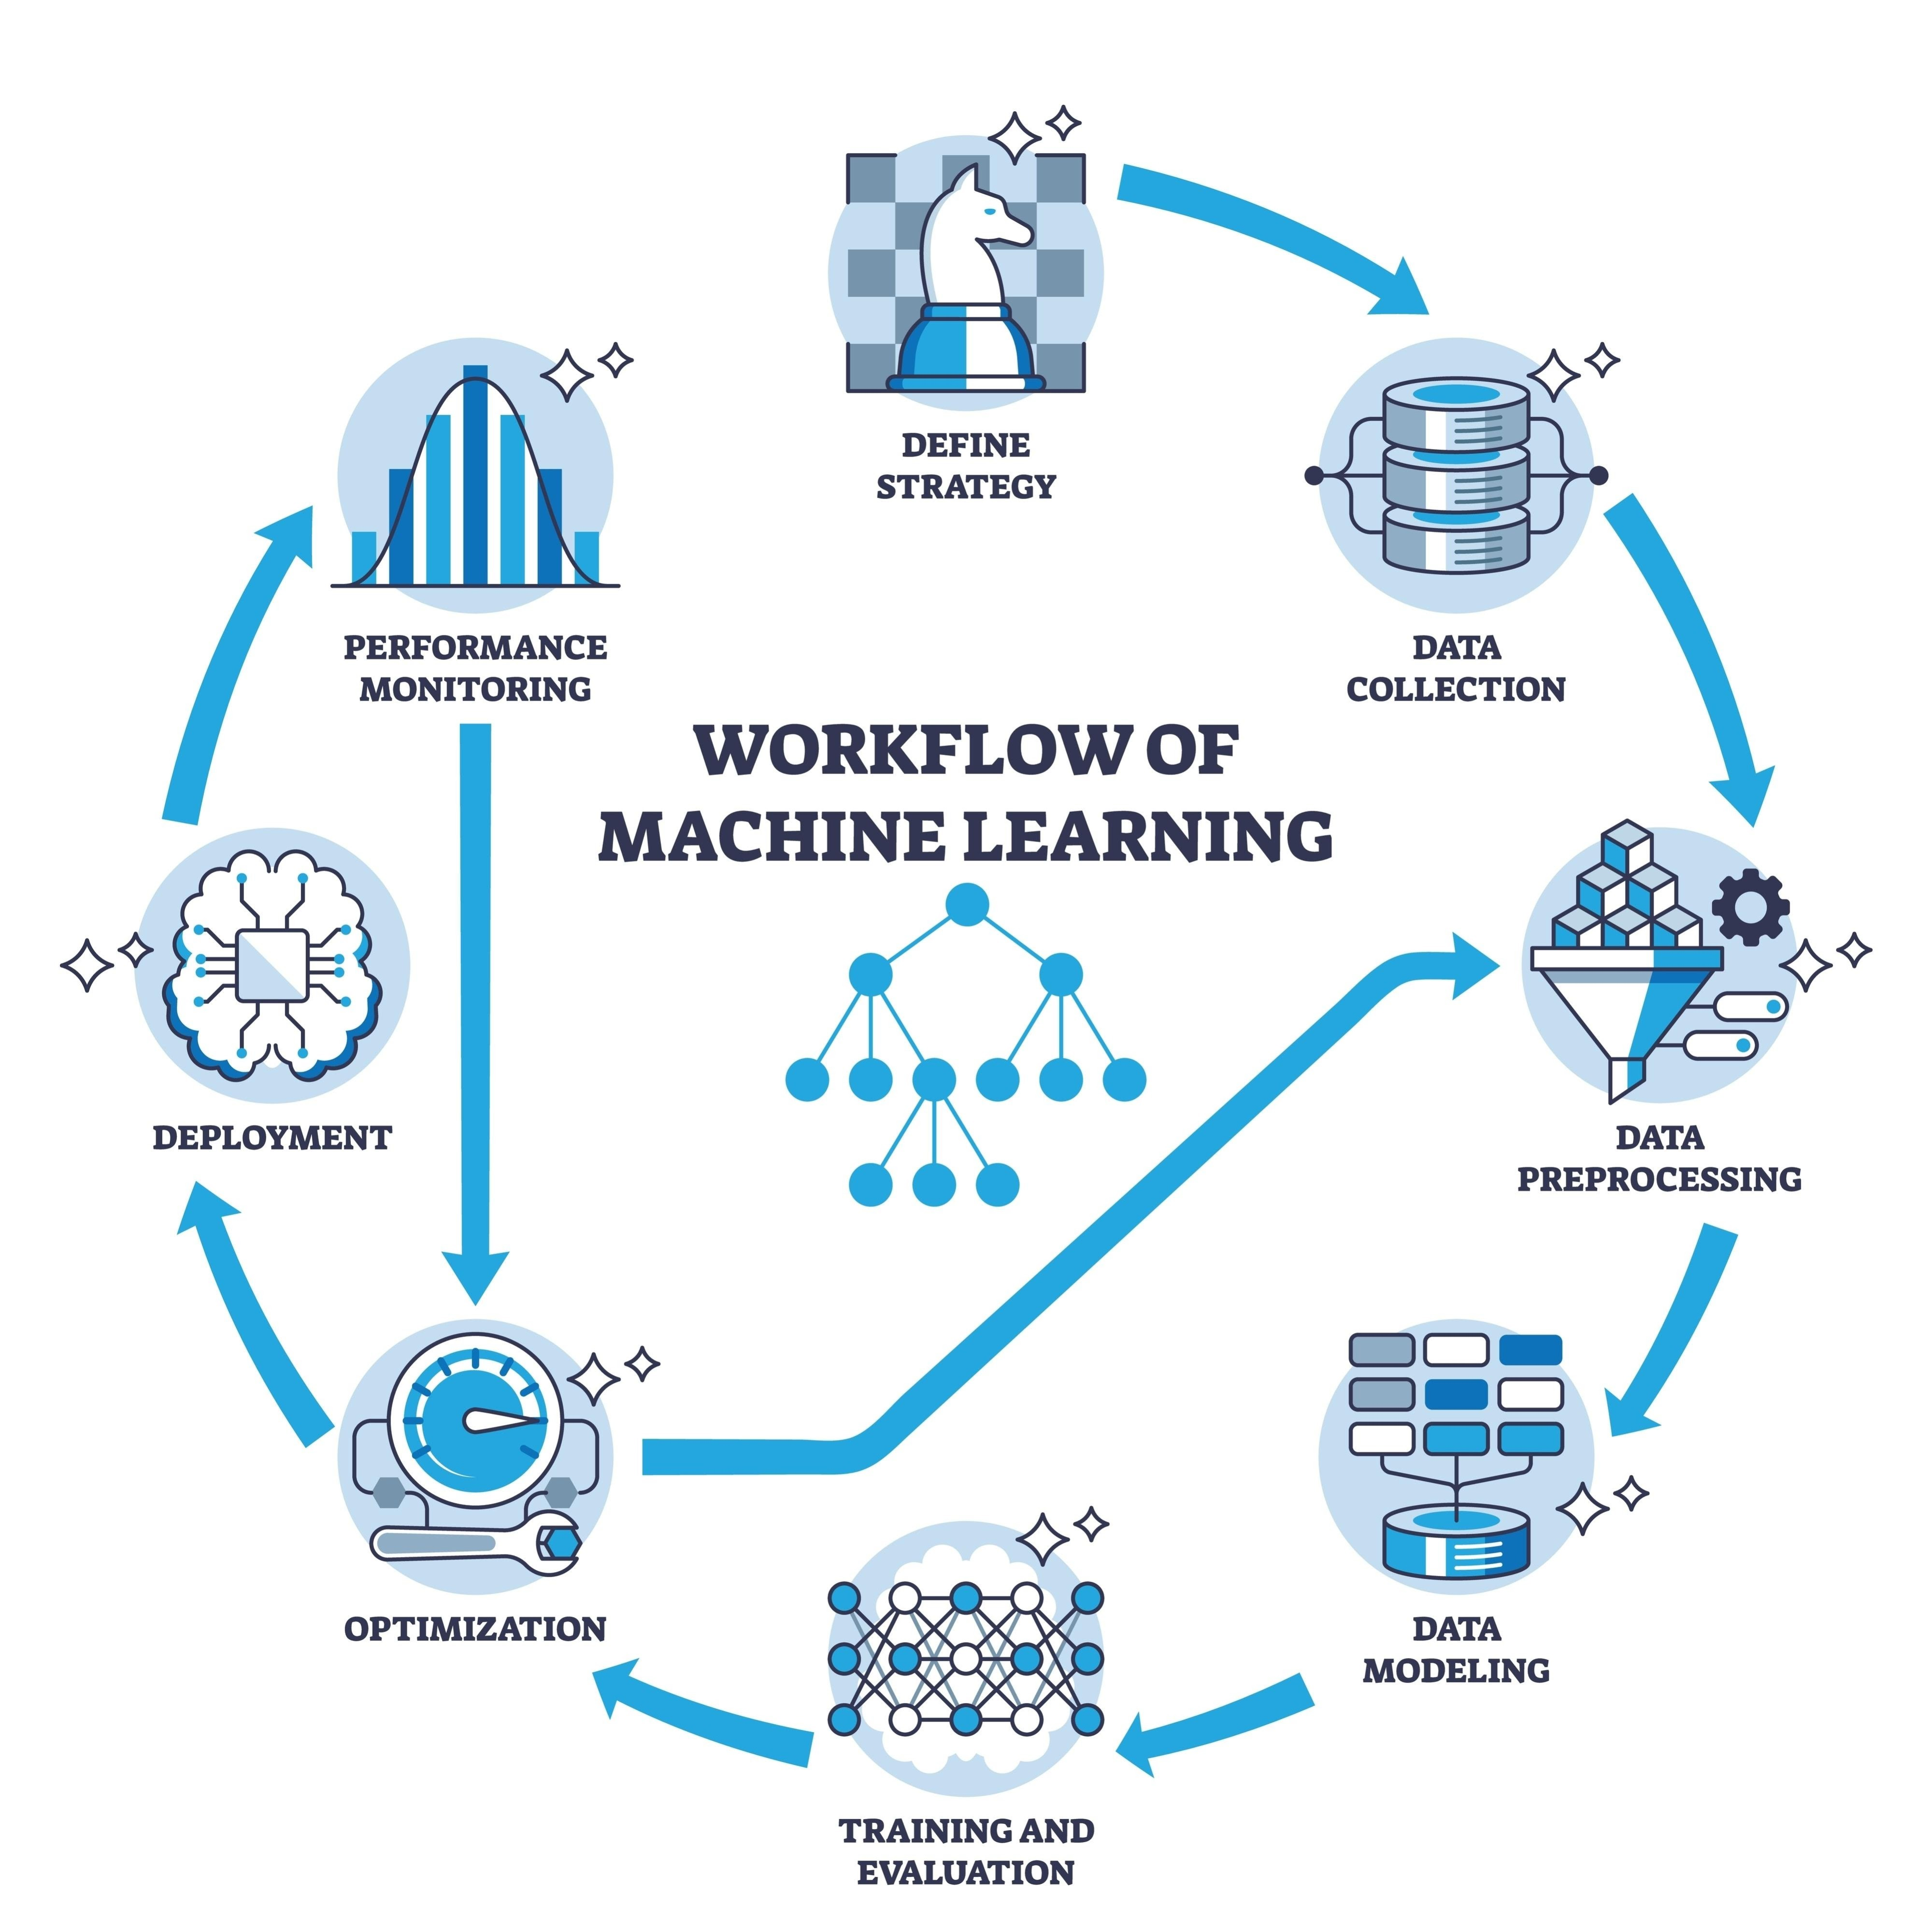
Model Selection: We use K-Nearest Neighbors (KNN) with $K=10$, an instance-based learning algorithm that classifies new data based on the majority class of its 10 nearest neighbors in the feature space.
Training and Testing: The data is split (80/20) for training and evaluation.

3. Evaluation
Accuracy Score: Measures the proportion of correctly classified instances.

Cross-Validation: 5-fold Cross-Validation is performed on the entire dataset to get a robust estimate of the model's performance, mitigating bias from a single train/test split.

Confusion Matrix: A critical visualization that shows the number of True Positives, True Negatives, False Positives, and False Negatives, providing insight into where the model made errors.



##Imports and Data Fetching

In [2]:
pip install ucimlrepo

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# Print data metadata and variable info (optional but good practice)
print("--- Metadata ---")
print(mushroom.metadata)
print("\n--- Variable Information ---")
print(mushroom.variables)

--- Metadata ---
{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edib

##Data Cleaning and Preprocessing Setup

In [4]:
# Data Cleaning: Remove rows with missing values ('?') and drop 'stalk-root'
x = X[~X.isin(['?']).any(axis=1)]
y = y.loc[x.index] # Align target variable to the cleaned features
x = x.drop('stalk-root', axis=1)

# Target Encoding: Convert 'e' (edible) and 'p' (poisonous) to 0 and 1
y = y["poisonous"].map({'e':0, 'p':1})

# Define Preprocessor: One-Hot Encoder for all categorical columns
preprocesore = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), x.columns)
])

print("\nCleaned Feature Matrix Shape:", x.shape)
print("Target Vector Shape:", y.shape)


Cleaned Feature Matrix Shape: (8124, 21)
Target Vector Shape: (8124,)


##Model Pipeline, Training, and Prediction

In [5]:
# Define Model Pipeline: Preprocessor followed by KNN Classifier
model = make_pipeline(preprocesore, KNeighborsClassifier(n_neighbors=10))

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Model
model.fit(x_train, y_train)

# Make Predictions on the Test Set
y_pred = model.predict(x_test)

# Calculate and Print Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nTEST ACCURACY = {test_accuracy:.4f}')


TEST ACCURACY = 1.0000


##Cross-Validation and Confusion Matrix


Cross-Validation Scores (5-fold): [0.85353846 1.         0.99323077 1.         0.78017241]
Mean Cross-Validation Accuracy: 0.9254


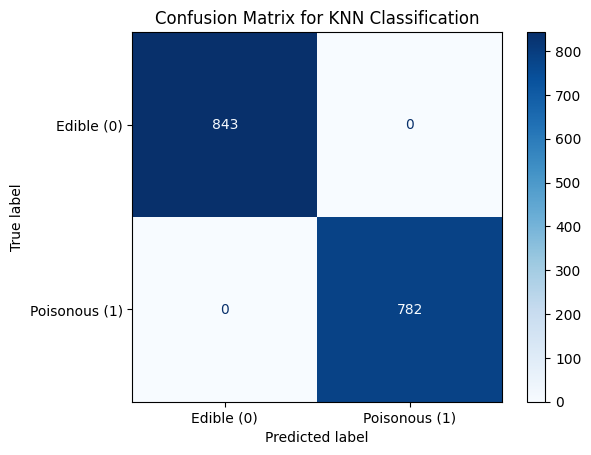

In [6]:
# Cross-Validation: Get robust performance estimate
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print(f'\nCross-Validation Scores (5-fold): {scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(scores):.4f}')

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
# Labels: 0 (Edible), 1 (Poisonous)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible (0)', 'Poisonous (1)'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN Classification")
plt.show()